# Clean And Analyze Employee Exit Survey

In this project, we will work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. For more information about the exit serveys, please visit: [TAFE](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and [DETE](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey)

We will play a role of data analyst and pretend our stakeholders want to know the following:
* Are employyees who only worked for the institutes for a short peroid of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

* Are younger employees resigning due to some kind of dissatisfaction? What about the older employyees?

We are required to combine the results for both surveys to answer these questions. In the dataset, a data dictionary wasn't provided. In general, we must meet with the manager to confirm the definitions of the data. In this project, we will use our general knowledge to define the columns. And here is a preview of couple important columns we will work with from the "dete_survey.csv".

Column Name in 'dete_survey.csv' | Description
---|---
ID | An id used to identify the participant of the surey
SeparationType | The reason why the person's employment ended
Cease Date | The year or month the person's employment ended
DETE Start Date | The year the person began employment with the DETE

Column Name in 'tage_survey.csv' | Description
---|---
Record ID | An id used to identify the participant of the survey
Reason for ceasing employment | The reason why the person's employment ended
LengthofServiceOverall. Overall Length of Service at Institute (in years) | The length of the person's employment (in years)

# Let's first read the datasets into pandas and do some explorations.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
dete_survey['DETE Start Date'].value_counts().head()

Not Stated    73
2011          40
2007          34
2008          31
2012          27
Name: DETE Start Date, dtype: int64

There are 822 rows and 56 columns in the dete dataset. Be aware that there are many values 'Not Stated' in the dataset, which should be classified as missing values but they are not written as Nan.

In [5]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


There are 702 entries and 72 columns in the dataset.

# Check for missing values

Torres Strait                  819
South Sea                      815
Aboriginal                     806
Disability                     799
NESB                           790
Business Unit                  696
Classification                 367
Opportunities for promotion     87
Career Aspirations              76
Wellness programs               56
Coach                           55
Further PD                      54
Workplace issue                 34
Feedback                        30
Health & Safety                 29
dtype: int64

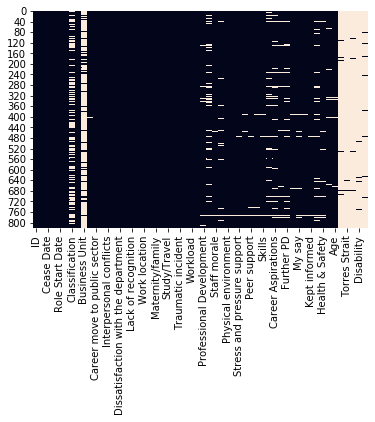

In [6]:
sumnull_dete = dete_survey.isnull().sum()
sns.heatmap(dete_survey.isnull(), cbar=False)
sumnull_dete.sort_values(ascending = False).head(15)

By inspecting the dete_survery using null checking with a heatmap, we found that there are many missing values in data and the missing values are mainly existed in the following collumns.

Name of columns | Number of missing values
---|---
Torres Strait    |                      819
South Sea       |                       815
Aboriginal       |                      806
Disability        |                     799
NESB               |                    790
Business Unit       |                   696
Classification       |                  367

As this dataset has 822 entries and 56 columns, we have to decide whether to remove these columns in the coming analysis.

Main Factor. Which of these was the main factor for leaving?                                                 589
InductionInfo. Topic:Did you undertake a Corporate Induction?                                                270
Contributing Factors. Ill Health                                                                             265
Contributing Factors. Maternity/Family                                                                       265
Contributing Factors. Career Move - Public Sector                                                            265
Contributing Factors. NONE                                                                                   265
Contributing Factors. Other                                                                                  265
Contributing Factors. Dissatisfaction                                                                        265
Contributing Factors. Career Move - Self-employment                                             

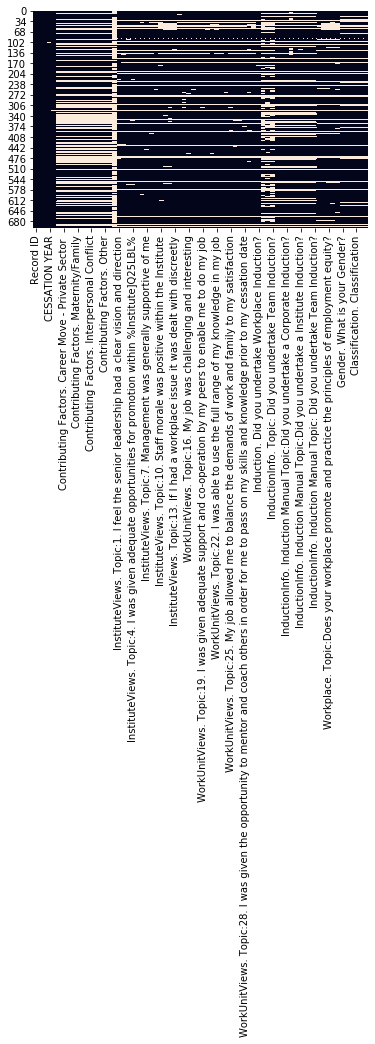

In [7]:
sumnull_tafe = tafe_survey.isnull().sum()
sns.heatmap(tafe_survey.isnull(), cbar=False)
sumnull_tafe.sort_values(ascending = False).head(20)

By referring to the heatmap, the missing values happen in many columns. The column 'Main Factor. Which of these was the main factor for leaving' has 589 null values, which is over 80% of the dataset (702 entries in total). We should consider whether to exclude this column for our analysis. 

For other columns consisting the null values, we found that the null values take 30 to 35% of the overall dataset. 

# Observations made:
* the dete_survey dataframe contains 'Not Stated' values that indicates values are missing, but they are not represented as NaN.
* Both dete_survey and tafe_survey dataframes contain many columns that we don't include in our data analysis. 
* Each dataframe contains many of the same columns, but the columns names are different.
* There are multiple columns / answers that indicate an employee resigned because they were dissatisfed.

We will handle the first two issues.

### Re-load the dete_survey into pandas 

In [8]:
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')

As there are 'Not Stated' values in dete servey, we re-load the dete_survey into panda, but this time read the Not Stated values in as NaN.

### Drop unnecesary columns

In [9]:
drop_cols = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(drop_cols, axis = 1)

In [10]:
drop_cols = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(drop_cols, axis = 1)

As there are many columns that we don't need to complete for our analysis. We drop some columns from each dataframe that we won't use in our analysis

Each dataframe contains many of the same columns, but the column names are different. We would like to use the following definition for our analysis.

dete_survey | tafe_survey| 	Definition
---|---|---
ID |	Record ID|	An id used to identify the participant of the survey
SeparationType|	Reason for ceasing employment |The reason why the participant's employment ended
Cease Date |CESSATION YEAR|	The year or month the participant's employment ended
DETE Start Date	| |	The year the participant began employment with the DETE
| LengthofServiceOverall. Overall Length of Service at Institute (in years) | The length of the person's employment (in years)
Age	CurrentAge. |Current Age |The age of the participant
Gender|	Gender. What is your Gender?|The gender of the participant

# We have to standardize the column names. 

In [11]:
dete_survey_updated.columns = (dete_survey_updated.columns
                               .str.lower()
                               .str.replace('\s+',' ')
                               .str.replace(' ','_'))
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [12]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [13]:
tafe_survey_updated.rename({'Record ID': 'id'}, inplace = True, axis = 1)
tafe_survey_updated.rename({'CESSATION YEAR': 'cease_date'}, inplace = True, axis = 1)
tafe_survey_updated.rename({'Reason for ceasing employment': 'separationtype'}, inplace = True, axis = 1)
tafe_survey_updated.rename({'Gender. What is your Gender?': 'gender'}, inplace = True, axis = 1)
tafe_survey_updated.rename({'CurrentAge. Current Age': 'age'}, inplace = True, axis = 1)
tafe_survey_updated.rename({'Employment Type. Employment Type': 'employment_status'}, inplace = True, axis = 1)
tafe_survey_updated.rename({'Classification. Classification': 'position'}, inplace = True, axis = 1)
tafe_survey_updated.rename({'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}, inplace = True, axis = 1)
tafe_survey_updated.rename({'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, inplace = True, axis = 1)

In [14]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [15]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

Now, we standardized the name of columns used in our analysis. Recalled that our goal is:
* Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at tthe job longer?

# separationtype column:
The 'separationtype' columns in each dataframe describes a number of different separation tyypes. In out project, we will only analyze survey respondents who resigned, their separation type should contain only string **'Resignation'**.

In the dete_survey_updated dataframe, there are multiple separations types with the string 'Resignation'
* Resignation - Other reasons
* Resignation - Ohter employer
* Resignation - Move overseas/interstate

In [16]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [17]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

## Select only the data for survey respondents who have a Resignation separation type.

In [18]:
resign1 = dete_survey_updated['separationtype']== 'Resignation-Other reasons'
resign2 = dete_survey_updated['separationtype']== 'Resignation-Other employer'
resign3 = dete_survey_updated['separationtype']== 'Resignation-Move overseas/interstate'
combined = resign1 | resign2 | resign3
dete_resignations = dete_survey_updated[combined].copy()

In [19]:
resign = tafe_survey_updated['separationtype']=='Resignation'
tafe_resignations = tafe_survey_updated[resign].copy()

# Let's verify that the data doesn't ontain any major inconsistencies.

We will focus on verifying that the years in 'cease_date' and 'dete_start_date' columns make sense.
* Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
* Given that most people in this field start working in their 20s, it is also unlikely that the dete_start_date was before 1940.

If there are many years higher than the current date or lower than 1940, there are problems with the dataset. Otherwises, we can simply remove the unrealistical outliers.

let's check the unique values in the 'cease_date' and 'dete_start_date' columns for dete dataframe and 'cease_date' column for tafe dataframe.

In [20]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype(float)
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [21]:
dete_resignations['cease_date'].value_counts().sort_index()

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

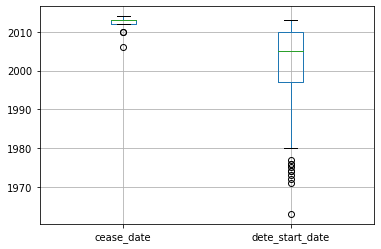

In [22]:
dete_resignations['dete_start_date'].value_counts().sort_index()

dete_resignations.boxplot(['cease_date', 'dete_start_date'])

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64


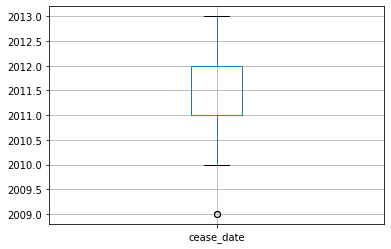

In [23]:
print(tafe_resignations['cease_date'].value_counts().sort_index())
tafe_resignations.boxplot(['cease_date'])

# Generate column 'institute_service' for dete_resignations

We found that the probability of the 'dete_start_date' was before the year 1940 is very low. We can simply remove the outliers.

We refer the length of time an employee spent in a workplace is their years of service. There is already a column called 'service' in tafe_resignations dataframe. We have renamed it to 'institute_service'. To analyze both surveys together, we have to create a corresponding 'institute_service' column for dete_resignations.

In [24]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

The 'institute_service' for dete_resignations can be found by subtracting the 'dete_start_date' column from the 'cease_date' column. 

# Identify any employees who resigned because of dissatisfaction

Here are columns we will  use to categorize employees as 'dissatisfied' from each dataframe.

**tafe_survey:**
* Contributing Factors. Dissatisfaction
* Contributing Factors. Job Dissatisfaction

**dete_survey:**
* job_dissatisfaction
* dissatisfaction_with_the_department
* physical_work_environment
* lack_of_recognition
* lack_of_job_security
* work_location
* employment_conditions
* work_life_balance
* workload

**Let's inspect the unique values of the two columns in tafe_resignations**

In [25]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [26]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

**Let's inspect the mentioned columns in dete_resignations.**

In [27]:
dete_cols = ['job_dissatisfaction'
        , 'dissatisfaction_with_the_department'
        , 'physical_work_environment'
        , 'lack_of_recognition'
        , 'lack_of_job_security'
        , 'work_location'
        , 'employment_conditions'
        , 'work_life_balance'
        , 'workload']
dete_resignations[dete_cols]

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
808,False,False,False,False,False,False,False,False,False
815,False,False,False,False,False,False,False,False,False
816,False,False,False,False,False,False,False,False,False
819,False,False,False,False,False,False,False,True,False


**Convert the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' columns in the tafe_resignations dataframe to True, False, or NaN values.**


In [28]:
def update_vals(val_col):
    if pd.isnull(val_col):
        return np.NaN
    elif val_col == '-':
        return False
    else:
        return True
    


In [29]:
tafe_cols = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations[tafe_cols] = tafe_resignations[tafe_cols].applymap(update_vals)
tafe_resignations[tafe_cols]

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
...,...,...
696,False,False
697,False,False
698,False,False
699,False,False


If any of the mentioned columns in the two resignations dataframes contain a True value, we'll add a True value to a new column named dissatisfied
* Return True if any element in the selected columns above is True
* Return False if none of the elements in the selected columns above is True
* Return NaN if the value is NaN

In [30]:
tafe_resignations['dissatisfied'] = tafe_resignations[tafe_cols].any(axis = 1, skipna = False)
dete_resignations['dissatisfied'] = dete_resignations[dete_cols].any(axis = 1, skipna = False)

In [31]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna = False)

False    241
True      91
True       8
Name: dissatisfied, dtype: int64

By now, we did:
* Renamed columns
* Dropped unnecessary data for our analysis
* Verified the quality of our data
* Created a new institute_service column
* Cleaned the Contributing Factors columns
* Created a new column indicating if an employee resigned because they were dissatisfied in some way

We aggregate the two dataset together and remove the columns which are not important for our analysis.

In [32]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [33]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined_updated = combined.dropna(thresh = 500, axis =1)

# Now, we clean up the institute_service column. 

In [34]:
combined_updated['institute_service'].value_counts().head(20)

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
Name: institute_service, dtype: int64

We'll use the slightly modified definitions below:

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [35]:
combined_updated_copy = combined_updated.copy()
years = combined_updated_copy['institute_service'].astype('str')
combined_updated_copy['institute_service'] = years.str.extract(r'(\d+)').astype(float)

In [36]:
def mapvalue(val):
    if val < 3:
        return 'New'
    elif (val >= 3) & (val <= 6):
        return 'Experienced'
    elif (val >= 7) & (val <= 10):
        return 'Established'
    elif val >= 11:
        return 'Veteran'
    elif pd.isnull(val):
        return 'Unknown'

In [37]:
combined_updated_copy['service_cat'] = combined_updated_copy['institute_service'].apply(mapvalue)

# Fill in missing values in the dissatisfied column

In [38]:
combined_updated_copy['dissatisfied'].value_counts(dropna = False)

False    403
True     240
True       8
Name: dissatisfied, dtype: int64

In [39]:
combined_updated_copy['dissatisfied'] = combined_updated_copy['dissatisfied'].fillna(True)

In [40]:
combined_pv = combined_updated_copy.pivot_table(index='service_cat', values='dissatisfied')

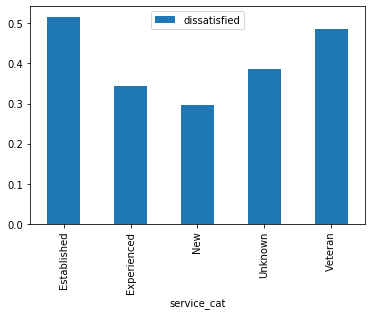

In [41]:
%matplotlib inline
combined_pv.plot(kind = 'bar')